In [2]:

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import time


In [15]:
import decoupler as dc
import pandas as pd
import sys
import pickle
import tqdm
import scipy
import pickle
# https://github.com/johannesbjork/LaCroixColoR pamplemousse
colors = ["#EA7580","#F6A1A5","#F8CD9C","#1BB6AF","#088BBE","#172869"]
passionfruit = ["#C70E7B", "#FC6882","#A6E000","#1BB6AF","#6C6C9D","#172869"]

In [4]:
with open('/home/ec2-user/curation/heart_datasets/gg_250328_male_glia_deseq.anndata.p', 'rb') as fp:
    dds_m=pickle.load(fp)
with open('/home/ec2-user/curation/heart_datasets/gg_250328_female_glia_deseq.anndata.p', 'rb') as fp:
    dds_f=pickle.load(fp)

In [5]:
res_m = pd.read_csv('/home/ec2-user/curation/heart_datasets/deseq/gg_250328_xist_pres_vs_abs_donor_id_2samp_male.csv',index_col=0)
res_f = pd.read_csv('/home/ec2-user/curation/heart_datasets/deseq/gg_250328_xist_pres_vs_abs_donor_id_2samp_female.csv',index_col=0)

In [6]:
print(len( res_f[(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)].index))
for x in res_f[(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)].index:print(x)

95
MRPL11
TPI1
EGFR
TSPYL1
RBP1
PRDM11
GAP43
ARHGAP17
TSPO
MRPL40
THOC7
PRKCSH
S100A1
CELF4
TMEM100
PRKAB1
SYP
HEXIM1
KANK4
DMTN
LTBP1
FABP4
IP6K3
RPL13A
EEF1A2
TNNC1
RORA
NANS
LAMB2
S100A6
SAC3D1
PDE3B
PBDC1
SLC52A2
SHARPIN
ACTR1A
SLFN13
P4HA2
MDGA1
NOSIP
TMEM160
PRPF19
BUD31
FAM181B
PCYT2
PCBP4
ZNF598
RAB11FIP4
CIC
KAZN
NKIRAS2
CCDC124
TRAF7
PRRG4
MTA1
CBLB
PSME2
NTHL1
KLHDC3
ALG3
TAF6
POLR2J
LSM10
PPIE
EPAS1
BRSK1
PDGFD
POLR3H
NEU1
RPS13
ATP10B
FAM98C
PGAM2
KIF5A
CREB3
SFT2D3
MRFAP1
ALKBH5
COPRS
TMEM183A
XIST
YTHDC2
MRPL41
AKR7A2
ARHGAP10
ZMAT5
CPM
ALG11
ZNF688
DCLK1
SCRN2
MYL2
LAMA2
TCEA2
MKRN3


In [7]:
print(len(res_f[(res_f['baseMean']>5)&(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)].index))
for x in res_f[(res_f['baseMean']>5)&(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)].index:print(x)


36
TPI1
TSPYL1
RBP1
GAP43
TSPO
MRPL40
THOC7
PRKCSH
LTBP1
RPL13A
EEF1A2
TNNC1
RORA
LAMB2
S100A6
PDE3B
ACTR1A
NOSIP
TMEM160
BUD31
PCBP4
KAZN
CCDC124
CBLB
POLR2J
EPAS1
RPS13
MRFAP1
XIST
YTHDC2
MRPL41
ARHGAP10
DCLK1
MYL2
LAMA2
TCEA2


In [8]:
print(len(res_m[(res_m['baseMean']>5)&(res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)].index))
for x in res_m[(res_m['baseMean']>5)&(res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)].index:print(x)


169
MEG3
PXDNL
CADPS
MDH1
CAMK1D
LSAMP
PLCL1
RHOBTB3
AFF3
COL6A3
UQCRH
TMSB4X
PDE7A
ACSM3
PLCXD3
MEIS2
PDE1A
CCDC80
CTNNA3
FOXP2
MYOM2
FRMD4B
LTBP1
SLCO3A1
PRKG1
PSME4
YBX3
MACROD2
PDE7B
NNT
PDLIM5
SASH1
CLSTN2
TTN
UNC5C
MPRIP
THSD7A
ARHGAP21
TNNT2
ZNRF2
SGCD
RBFOX1
LDLRAD4
ACTA1
MITF
MYOM1
CACNA1C
LDB2
SLC5A7
PID1
PALMD
CD36
NEBL
RCAN2
EMP1
EBF2
GRK5
ELL2
RYR2
PDE3A
ZNF804B
SETBP1
ROBO1
CFH
ARHGAP6
HDAC9
FAM135B
CFD
TCAP
CHRM2
FILIP1
PRR16
OPCML
SLC8A1
CRIM1
MGP
KCNMA1
AKAP6
CACNB2
RNF150
ABCA10
PDLIM3
KAZN
MLIP
FLNA
SLC25A4
TMTC1
MAST4
ZFPM2
CBLB
ACTN2
FGF12
PTPRK
EEF1A1
ADAMTS9
ADAMTSL3
RPS6
HSP90AB1
LDB3
RPL41
ABI3BP
EPAS1
FABP3
MYH7
GBE1
EPB41L4A
RPL6
PDGFD
NDUFAB1
SESN3
KALRN
ACTC1
CHST9
GRID2
CDK8
HLA-B
CCSER1
PLA2G5
SYNPO2
C1S
TSHZ2
SOX5
RASAL2
DCN
RPL12
TNNI3
MYBPC3
MSI2
NEXN
CASQ2
PCDH7
INPP4B
TECRL
DES
ADAMTSL1
MTUS1
NRG3
PHACTR1
RUNX2
ASAP1
XIST
ANKRD1
SVIL
FGF14
KCNT2
BNC2
CPEB4
MECOM
PPP2R2B
ARHGAP10
ERBB4
RBM20
FN1
PLCB4
THSD4
MAGI1
SERINC5
TRPM3
TRIO
DIAPH2
NAV3
RPS8
MY

In [9]:
res_m.loc[['SLC8A1','CACNB2','CACNA1C','RYR2','FGF12','PHACTR1','UNC5C','ERBB4','FLNA','NRG3']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
SLC8A1,36.844570,-0.442617,0.089355,-4.953461,7.290504e-07,0.000049,2
CACNB2,11.511650,-0.364521,0.094269,-3.866832,1.102583e-04,0.001953,10
CACNA1C,23.489054,-0.414342,0.099214,-4.176237,2.963709e-05,0.000724,12
RYR2,91.716940,-0.458179,0.099639,-4.598402,4.257447e-06,0.000166,1
FGF12,33.414730,-0.386784,0.091239,-4.239255,2.242627e-05,0.000592,3
PHACTR1,5.457613,-0.341779,0.102342,-3.339570,8.390832e-04,0.008735,6
UNC5C,6.034395,-0.434554,0.099219,-4.379752,1.188143e-05,0.000360,4
ERBB4,13.490284,-0.366932,0.086849,-4.224923,2.390225e-05,0.000619,2
FLNA,5.174485,-0.262662,0.064341,-4.082378,4.457717e-05,0.000954,X
NRG3,6.909535,-0.439191,0.136881,-3.208551,1.334055e-03,0.011672,10


In [10]:
res_m.loc[(res_m['baseMean']>5)&(res_m['log2FoldChange']>0.25)&(res_m['padj']<0.05)]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
SLC5A7,8.407398,0.394905,0.071066,5.556852,2.746836e-08,4.940209e-06,2
FAM135B,11.869269,0.356149,0.047954,7.426828,1.112327e-13,3.201834e-10,8
OPCML,7.982577,0.357323,0.105620,3.383105,7.167125e-04,7.755853e-03,11
KCNMA1,13.459209,0.345569,0.078450,4.404971,1.057978e-05,3.239776e-04,10
CHST9,12.449410,0.323934,0.054675,5.924691,3.128845e-09,8.577504e-07,18
GRID2,8.951902,0.397095,0.084156,4.718549,2.375324e-06,1.130144e-04,4
XIST,23.305323,8.171592,0.220198,37.110177,1.925309e-301,1.108401e-297,X
ALK,15.054974,0.316964,0.069010,4.593032,4.368525e-06,1.676815e-04,2


In [11]:
res_f.loc[['TNNC1','RYR2','MYL2','TSPO','GAP43']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
TNNC1,21.916174,-0.673441,0.159721,-4.216358,0.000025,0.017757,3
RYR2,75.383540,0.685286,0.209617,3.269229,0.001078,0.064305,1
MYL2,13.641720,-0.658480,0.147340,-4.469121,0.000008,0.014261,12
TSPO,8.530129,-0.737716,0.181823,-4.057339,0.000050,0.018076,22
GAP43,39.673332,-1.469536,0.392712,-3.742021,0.000183,0.032532,3


In [12]:
res_m.loc[['TNNC1','RYR2','MYL2','TSPO','GAP43']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
TNNC1,24.890194,-0.191313,0.050068,-3.821078,0.000133,0.002204,3
RYR2,91.716940,-0.458179,0.099639,-4.598402,0.000004,0.000166,1
MYL2,14.122838,-0.263616,0.087554,-3.010907,0.002605,0.018933,12
TSPO,2.716568,-0.010091,0.080476,-0.125391,0.900214,0.939375,22
GAP43,0.630638,-0.168202,0.347810,-0.483604,0.628667,NaN,3


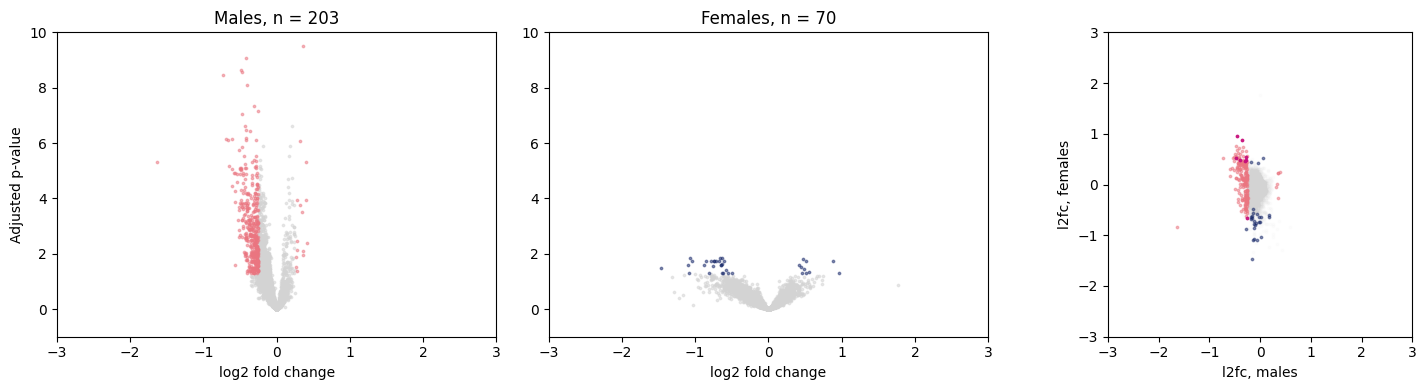

In [18]:
fld = 'padj'

fig1,ax1=plt.subplots(1,3,figsize=(15,4))

res_f = res_f[res_f['baseMean']>5]

gfm = (res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)
ax1[0].scatter(res_m.loc[~gfm,'log2FoldChange'],-np.log10(res_m.loc[~gfm,fld]),3,'lightgray',alpha=0.5)
ax1[0].scatter(res_m.loc[gfm,'log2FoldChange'],-np.log10(res_m.loc[gfm,fld]),3,colors[0],alpha=0.5)

gff = (res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)
ax1[1].scatter(res_f.loc[~gff,'log2FoldChange'],-np.log10(res_f.loc[~gff,fld]),3,'lightgray',alpha=0.5)
ax1[1].scatter(res_f.loc[gff,'log2FoldChange'],-np.log10(res_f.loc[gff,fld]),3,colors[5],alpha=0.5)

ymax = 10
xmax = 3
ax1[0].set_xlim([-xmax,xmax])
ax1[1].set_xlim([-xmax,xmax])
ax1[0].set_ylim([-1,ymax])
ax1[1].set_ylim([-1,ymax])
ax1[0].set_xlabel('log2 fold change')
ax1[1].set_xlabel('log2 fold change')
ax1[0].set_ylabel('Adjusted p-value')
nm = int(len(dds_m.obs['donor-id'].unique()))
ax1[0].set_title(f'Males, n = {nm}')
nf = int(len(dds_f.obs['donor-id'].unique()))
ax1[1].set_title(f'Females, n = {nf}')

ax1[2].scatter(res_m.loc[(~gfm)&(~gff),'log2FoldChange'],res_f.loc[(~gfm)&(~gff),'log2FoldChange'],3,'lightgray',alpha=0.04)
ax1[2].scatter(res_m.loc[(gfm)&(~gff),'log2FoldChange'],res_f.loc[(gfm)&(~gff),'log2FoldChange'],3,colors[0],alpha=0.5)
ax1[2].scatter(res_m.loc[(~gfm)&(gff),'log2FoldChange'],res_f.loc[(~gfm)&(gff),'log2FoldChange'],3,colors[5],alpha=0.5)
ax1[2].scatter(res_m.loc[(gfm)&(gff),'log2FoldChange'],res_f.loc[(gfm)&(gff),'log2FoldChange'],3,passionfruit[0],alpha=0.9)

xmax = 3
ax1[2].set_xlim([-xmax,xmax])
ax1[2].set_ylim([-xmax,xmax])
ax1[2].set_aspect('equal', 'box')
ax1[2].set_xlabel('l2fc, males')
ax1[2].set_ylabel('l2fc, females')
fig1.tight_layout()
# fig1.savefig('./gg2503_xist/2samp_DE.png',dpi=450)

In [40]:
print(1-(res_m['baseMean']>5).mean())
print(len(res_m))

0.7728803772495428
10391


In [51]:
(dds_m.obs['psbulk_n_cells']<10).mean()

0.16502463054187191

In [20]:
res_m.loc[['SPEN','HDAC3','HNRNPU']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
SPEN,6.065432,-0.246064,0.049312,-4.989950,6.039479e-07,0.000042,1
HDAC3,1.881739,-0.197585,0.089704,-2.202638,2.762025e-02,0.097792,5
HNRNPU,11.470808,-0.067458,0.040530,-1.664411,9.603027e-02,0.223553,1


In [21]:
res_m.sort_values('log2FoldChange')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
DPP10,3.288046,-1.638897,0.295493,-5.546310,2.917615e-08,4.940209e-06,2
IL34,1.090410,-0.756154,0.188872,-4.003527,6.240500e-05,NaN,16
NAV3,8.283326,-0.733564,0.105608,-6.946112,3.754904e-12,3.602830e-09,12
ADCY5,2.269666,-0.689925,0.115080,-5.995191,2.032466e-09,7.313066e-07,3
RUNX2,5.285327,-0.670456,0.112303,-5.970074,2.371458e-09,7.584712e-07,6
...,...,...,...,...,...,...,...
RAB36,0.176796,0.768688,2.900342,0.265034,7.909836e-01,NaN,22
CD27,0.045767,0.773637,2.903624,0.266439,7.899015e-01,NaN,12
PCDHB15,0.191933,0.833938,2.900393,0.287526,7.737096e-01,NaN,5
TSIX,0.690582,1.075170,0.211898,5.074004,3.895307e-07,NaN,X


In [22]:
for x in res_m.loc[gfm].index: print(x)

MEG3
FAM110B
MYOCD
EGFR
PXDNL
PFDN2
CADPS
WDR64
SHROOM3
DPP10
ZNF208
TGM2
MDH1
SMAD3
CAMK1D
LSAMP
ZNF430
PLCL1
MYH7B
GALM
RHOBTB3
AATK
MYL3
AFF3
COL6A3
UQCRH
CKMT2
TMSB4X
OAZ2
PDE7A
CLCN6
DDX52
TRIM9
SCAMP2
ACSM3
ACADVL
PLCXD3
SMOC2
ARHGDIA
COPE
PPP1R13B
BACE2
DYNLL1
MEIS2
PDE1A
CCDC80
RAPGEF4
CTNNA3
FOXP2
DNM3
TMEM108
HCFC2
NPAS2
GOT2
RHOJ
TANGO2
GALNT7
TNC
TNXB
MYOM2
FRMD4B
ADCY5
LTBP1
SLCO3A1
PRKG1
SLC19A2
EDNRA
CCDC88A
PSME4
LINC01117
GABARAPL1
NEK11
YBX3
MTCH1
GPI
FMO2
DGKI
MACROD2
PDE7B
COLEC12
NNT
SYTL2
DOCK3
ABCC9
AGAP3
NMD3
SMPX
NRCAM
PDLIM5
MCL1
EIF1AY
SASH1
CLSTN2
TTN
SULF1
NES
CRTAP
MDH2
UNC5C
MPRIP
ATP6AP1
BCO2
PDE4B
THSD7A
EPHA3
IQSEC1
FREM1
DAGLA
SFT2D2
ARHGAP21
GAS2
TNNT2
ZNRF2
SGCD
SAMD5
MGLL
THRB
EDIL3
RBFOX1
LDLRAD4
ACTA1
MITF
MYOM1
BTG2
CACNA1C
HSPB8
TNIK
PYGB
PKP2
LDB2
SLC5A7
PID1
PALMD
CD36
PLCL2
ZSWIM5
SERPINE2
PRUNE2
NEBL
RCAN2
EEF2K
EMP1
SLC17A5
EBF2
GRK5
MICAL2
ELL2
RYR2
GATA4
PDE3A
TIAM1
ZNF804B
SETBP1
ROBO1
ICA1L
SNX30
CTSB
CFH
NR2F2
BCAP31
ARID5B
ARHGAP6
CO

In [23]:
res_m[gfm&(res_m['log2FoldChange']>0)&(res_m['baseMean']>10)]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
FAM135B,11.869269,0.356149,0.047954,7.426828,1.112327e-13,3.201834e-10,8
KCNMA1,13.459209,0.345569,0.078450,4.404971,1.057978e-05,3.239776e-04,10
CHST9,12.449410,0.323934,0.054675,5.924691,3.128845e-09,8.577504e-07,18
XIST,23.305323,8.171592,0.220198,37.110177,1.925309e-301,1.108401e-297,X
ALK,15.054974,0.316964,0.069010,4.593032,4.368525e-06,1.676815e-04,2


In [24]:
res_m.loc[['PDE7A','PDE7B','PDE4B','CAP2','PDE1A','PDE3A']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
PDE7A,6.388640,-0.294497,0.078086,-3.771461,1.622945e-04,0.002472,8
PDE7B,7.623078,-0.300220,0.079469,-3.777830,1.582009e-04,0.002470,6
PDE4B,3.223224,-0.471200,0.103673,-4.545038,5.492532e-06,0.000199,1
CAP2,2.685843,-0.259402,0.096375,-2.691597,7.111078e-03,0.038989,6
PDE1A,6.105710,-0.483356,0.102211,-4.729011,2.256156e-06,0.000111,2
PDE3A,21.535212,-0.439631,0.077603,-5.665149,1.468973e-08,0.000003,12


In [25]:
res_f.loc[['LAMA2']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
LAMA2,90.06907,0.474956,0.110274,4.307065,0.000017,0.015396,6


In [26]:
res_m[gfm&(res_m['baseMean']>20)].sort_values('padj')[:30]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
XIST,23.305323,8.171592,0.220198,37.110177,1.925309e-301,1.108401e-297,X
TRIO,24.103472,-0.256837,0.039829,-6.448488,1.129717e-10,7.226423e-08,5
DCN,21.366156,-0.435704,0.070010,-6.223438,4.863777e-10,2.333397e-07,12
CTNNA3,28.170942,-0.423940,0.068935,-6.149882,7.754052e-10,3.433852e-07,10
PRKG1,43.930030,-0.415321,0.069020,-6.017374,1.772691e-09,6.803589e-07,10
ACTC1,56.185340,-0.282215,0.047472,-5.944920,2.765924e-09,7.961711e-07,15
PDE3A,21.535212,-0.439631,0.077603,-5.665149,1.468973e-08,3.045337e-06,12
PDLIM5,28.950174,-0.294453,0.054036,-5.449228,5.058879e-08,7.467683e-06,4
PPP2R2B,24.291967,-0.434957,0.080343,-5.413748,6.171887e-08,8.075353e-06,5
ANKRD1,24.657850,-0.416254,0.078871,-5.277655,1.308473e-07,1.345157e-05,10


In [27]:
assert (dds_m[dds_m.obs['xist']=='absent'].obs['donor-id'].values==dds_m[dds_m.obs['xist']=='present'].obs['donor-id'].values).all()

Text(0.5, 1.0, 'Female donors')

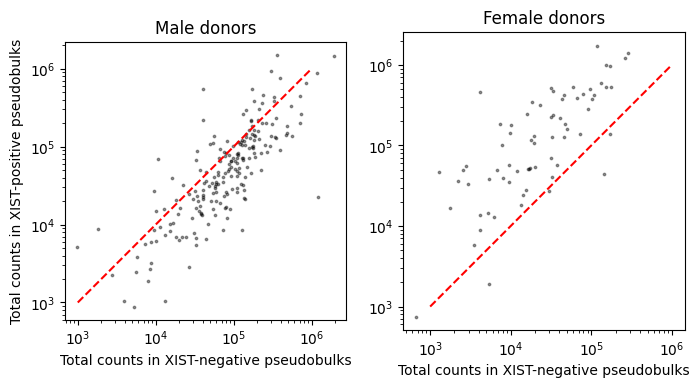

In [28]:
fig1,ax1=plt.subplots(1,2,figsize=(8,4))
assert (dds_m[dds_m.obs['xist']=='absent'].obs['donor-id'].values==dds_m[dds_m.obs['xist']=='present'].obs['donor-id'].values).all()
assert (dds_f[dds_f.obs['xist']=='absent'].obs['donor-id'].values==dds_f[dds_f.obs['xist']=='present'].obs['donor-id'].values).all()
ax1[0].scatter(dds_m[dds_m.obs['xist']=='absent'].obs['psbulk_counts'],dds_m[dds_m.obs['xist']=='present'].obs['psbulk_counts'],
            3,'k',alpha=0.4)
ax1[1].scatter(dds_f[dds_f.obs['xist']=='absent'].obs['psbulk_counts'],dds_f[dds_f.obs['xist']=='present'].obs['psbulk_counts'],
            3,'k',alpha=0.4)
xl = [1e3,1e6]
ax1[0].plot(xl,xl,'r--')
ax1[1].plot(xl,xl,'r--')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')
ax1[0].set_aspect('equal', 'box')
ax1[1].set_aspect('equal', 'box')
ax1[0].set_ylabel('Total counts in XIST-positive pseudobulks')
ax1[0].set_xlabel('Total counts in XIST-negative pseudobulks')
ax1[1].set_xlabel('Total counts in XIST-negative pseudobulks')
ax1[0].set_title('Male donors')
ax1[1].set_title('Female donors')

In [29]:
def compare_gex_between_xist_posneg(gene,dds_m,dds_f):
    fig1,ax1=plt.subplots(1,2,figsize=(8,4))

    x = dds_m[dds_m.obs['xist']=='absent',gene]
    y = dds_m[dds_m.obs['xist']=='present',gene]
    ax1[0].scatter(dds_m[dds_m.obs['xist']=='absent',gene].layers['normed_counts']+1,
                   dds_m[dds_m.obs['xist']=='present',gene].layers['normed_counts']+1,
                3,'k',alpha=0.4)
    ax1[1].scatter(dds_f[dds_f.obs['xist']=='absent',gene].layers['normed_counts']+1,
                   dds_f[dds_f.obs['xist']=='present',gene].layers['normed_counts']+1,
                3,'k',alpha=0.4)
    xl=[1,1e3]
    ax1[0].plot(xl,xl,'r--')
    ax1[1].plot(xl,xl,'r--')
    ax1[0].set_xscale('log')
    ax1[1].set_xscale('log')
    ax1[0].set_yscale('log')
    ax1[1].set_yscale('log')
    ax1[0].set_xlabel('Normalized counts + 1 in XIST-negative')
    ax1[0].set_ylabel('Normalized counts + 1 in XIST-positive')
    ax1[1].set_xlabel('Normalized counts + 1 in XIST-negative')
    ax1[1].set_ylabel('Normalized counts + 1 in XIST-positive')
    ax1[0].set_title(gene+' in male samples')
    ax1[1].set_title(gene+' in female samples')
    fig1.tight_layout()

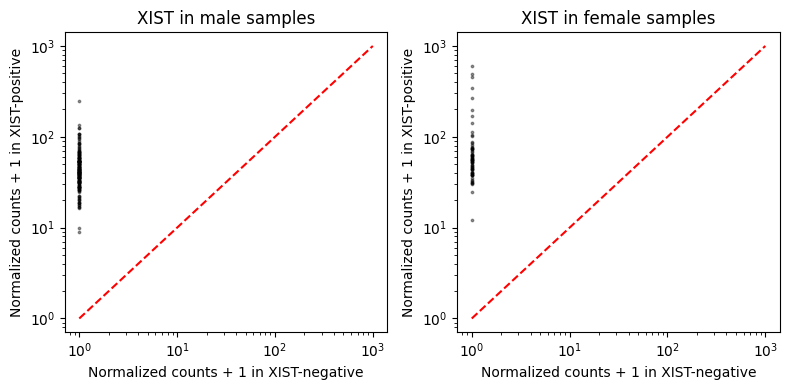

In [30]:
gene = 'XIST'
compare_gex_between_xist_posneg(gene,dds_m,dds_f)

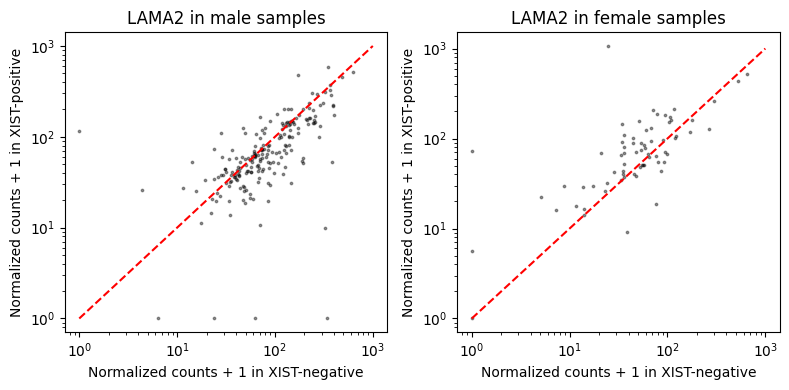

In [31]:
gene = 'LAMA2'
compare_gex_between_xist_posneg(gene,dds_m,dds_f)

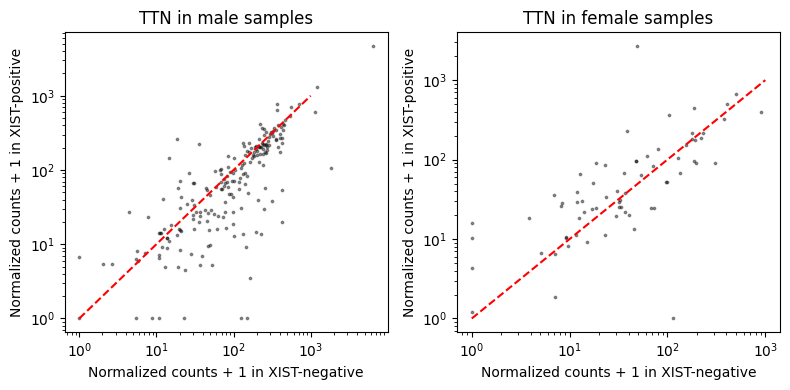

In [32]:
compare_gex_between_xist_posneg('TTN',dds_m,dds_f)

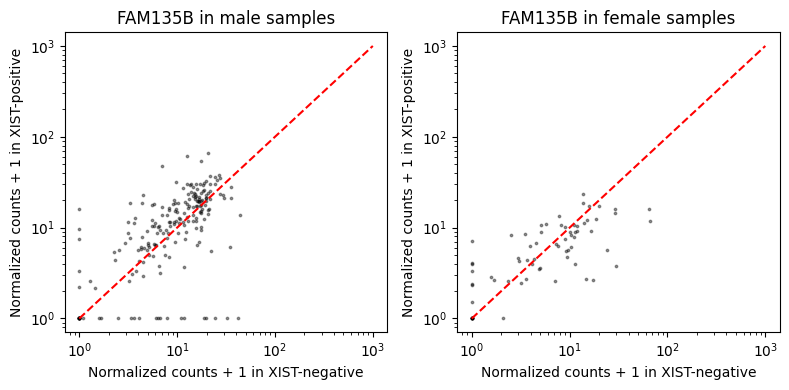

In [33]:
compare_gex_between_xist_posneg('FAM135B',dds_m,dds_f)

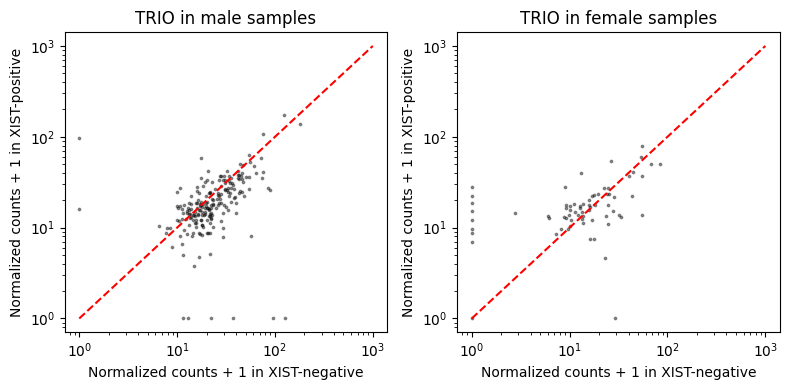

In [34]:
compare_gex_between_xist_posneg('TRIO',dds_m,dds_f)